# Assignment 2, MACS 30000 (Dr. Evans)

### Submitted by Junho Choi

Due Wednesday, Oct. 17 at 11:30 AM

This file contains the coding work that was used in completing this assignment.
Please refer to the .pdf file for more detailed answers.

In [279]:
# Import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn')

### Problem 1

#### Problem 1-(b)

In [280]:
# Reading in the datasets
header1 = ["labinc", "capinc", "height", "weight"]
header2 = ["totinc", "weight", "age", "female"]
besty = pd.read_csv('BestIncome.txt', sep = ",", header = None, names = header1)
survy = pd.read_csv('SurvIncome.txt', sep = ",", header = None, names = header2)

# Creating total income in BestIncome
totinc_impu = besty["labinc"] + besty["capinc"]
besty["totinc_impu"] = totinc_impu
print(besty.head())

         labinc        capinc     height      weight   totinc_impu
0  52655.605507   9279.509829  64.568138  152.920634  61935.115336
1  70586.979225   9451.016902  65.727648  159.534414  80037.996127
2  53738.008339   8078.132315  66.268796  152.502405  61816.140654
3  55128.180903  12692.670403  62.910559  149.218189  67820.851305
4  44482.794867   9812.975746  68.678295  152.726358  54295.770612


In [281]:
# Regression analysis (no. 1, OLS) with SurvIncome
# dependent variable: age
# explanatory variable: totinc, weight

# Setting up the regression variables
exp_vars = survy[["totinc", "weight"]]
exp_vars = sm.add_constant(exp_vars, prepend=False)
dep_var = survy["age"]

# Running the aforementioned regression
m1 = sm.OLS(dep_var, exp_vars)
result = m1.fit()
print(result.summary())

# Extracting and saving the regression coefficients
coeff = result.params

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6326
Date:                Wed, 17 Oct 2018   Prob (F-statistic):              0.531
Time:                        00:59:10   Log-Likelihood:                -3199.4
No. Observations:                1000   AIC:                             6405.
Df Residuals:                     997   BIC:                             6419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
totinc       2.52e-05   2.26e-05      1.114      0.2

In [282]:
# Imputing the age in BestIncome
age_impu = coeff[2] + coeff[0] * besty["totinc_impu"] \
           + coeff[1] * besty["weight"]
besty["age_impu"] = age_impu

# Presenting the "head" of SurvIncome after height imputation
print(besty.head())

         labinc        capinc     height      weight   totinc_impu   age_impu
0  52655.605507   9279.509829  64.568138  152.920634  61935.115336  44.742614
1  70586.979225   9451.016902  65.727648  159.534414  80037.996127  45.154387
2  53738.008339   8078.132315  66.268796  152.502405  61816.140654  44.742427
3  55128.180903  12692.670403  62.910559  149.218189  67820.851305  44.915836
4  44482.794867   9812.975746  68.678295  152.726358  54295.770612  44.551391


In [283]:
'''
Regression analysis (no. 2, logistic) with SurvIncome
dependent variable: female
explanatory variable: totinc, weight, age
'''

# Setting up the regression variables
exp_vars2 = survy[["totinc", "weight"]]
exp_vars2 = sm.add_constant(exp_vars2)
dep_var2 = survy["female"]

# Running the aforementioned regression
m2 = sm.Logit(dep_var2, exp_vars2)
result2 = m2.fit()
print(result2.summary2())

# Extracting and saving the regression coefficients
coeff2 = result2.params

Optimization terminated successfully.
         Current function value: 0.036050
         Iterations 11
                        Results: Logit
Model:              Logit            No. Iterations:   11.0000
Dependent Variable: female           Pseudo R-squared: 0.948  
Date:               2018-10-17 00:59 AIC:              78.1009
No. Observations:   1000             BIC:              92.8242
Df Model:           2                Log-Likelihood:   -36.050
Df Residuals:       997              LL-Null:          -693.15
Converged:          1.0000           Scale:            1.0000 
---------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
---------------------------------------------------------------
const      76.7929   10.5690   7.2659  0.0000  56.0781  97.5077
totinc     -0.0002    0.0000  -3.6602  0.0003  -0.0002  -0.0001
weight     -0.4460    0.0618  -7.2185  0.0000  -0.5672  -0.3249



In [284]:
# Manually calculating the probability has led to a math range error,
# and therefore I will be relying on scikit-learn.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept = True, C = 1e9)
exp_vars2 = survy[["totinc", "weight"]]

# scikit-learn's LogisticRegression has different configurations
# in comparison to statsmodel.api; therefore, the coefficients
# and intercept are different.

result2_2 = lr.fit(exp_vars2, dep_var2)
print(result2_2.intercept_, result2_2.coef_)

# Imputing the variable 'female' in BestIncome
fem_impu = result2_2.predict(besty[["totinc_impu", "weight"]])
besty["female_impu"] = fem_impu

# Presenting the "head" of SurvIncome after height imputation
print(besty.head())

[0.03294246] [[ 9.22210066e-05 -4.17849763e-02]]
         labinc        capinc     height      weight   totinc_impu   age_impu  \
0  52655.605507   9279.509829  64.568138  152.920634  61935.115336  44.742614   
1  70586.979225   9451.016902  65.727648  159.534414  80037.996127  45.154387   
2  53738.008339   8078.132315  66.268796  152.502405  61816.140654  44.742427   
3  55128.180903  12692.670403  62.910559  149.218189  67820.851305  44.915836   
4  44482.794867   9812.975746  68.678295  152.726358  54295.770612  44.551391   

   female_impu  
0          0.0  
1          1.0  
2          0.0  
3          1.0  
4          0.0  


#### Problem 1-(c)

In [285]:
# descStat = besty[["totinc_impu", "age_impu", "female_impu"]].describe()
print(descStat)

descStat2 = survy[["totinc", "age", "female"]].describe()
print(descStat2)

        totinc_impu      age_impu   female_impu
count  10000.000000  10000.000000  10000.000000
mean   67038.723697     44.890828      0.471700
std     8294.497996      0.219150      0.499223
min    33651.691815     43.976495      0.000000
25%    61452.517672     44.743776      0.000000
50%    67042.751487     44.886944      0.000000
75%    72636.874684     45.038991      1.000000
max    98996.053756     45.703819      1.000000
             totinc          age      female
count   1000.000000  1000.000000  1000.00000
mean   64871.210860    44.839320     0.50000
std     9542.444214     5.939185     0.50025
min    31816.281649    25.741333     0.00000
25%    58349.862384    41.025231     0.00000
50%    65281.271149    44.955981     0.50000
75%    71749.038000    48.817644     1.00000
max    92556.135462    66.534646     1.00000


#### Problem 1-(d)

In [286]:
# Correlation matrix code and output

wout_tot = ["labinc", "capinc", "height", "weight", "age_impu", "female_impu"]
besty_wout_tot = besty[wout_tot]
print(besty_wout_tot.corr())

               labinc    capinc    height    weight  age_impu  female_impu
labinc       1.000000  0.005325  0.002790  0.004507  0.924053     0.677675
capinc       0.005325  1.000000  0.021572  0.006299  0.234159     0.176901
height       0.002790  0.021572  1.000000  0.172103 -0.045083    -0.066972
weight       0.004507  0.006299  0.172103  1.000000 -0.300288    -0.382659
age_impu     0.924053  0.234159 -0.045083 -0.300288  1.000000     0.784260
female_impu  0.677675  0.176901 -0.066972 -0.382659  0.784260     1.000000


### Problem 2

#### Problem 2-(a)

In [287]:
# Dataset read-in: IncomeIntel.txt
head = ["gradyr", "greqnt", "salary"]
iintel = pd.read_csv('IncomeIntel.txt', sep = ",", header = None, names = head)

# Declaring variables
gradyr = iintel[head[0]]
greqnt = iintel[head[1]]
salary = iintel[head[2]]

# Setting up the regression variables
exp_vars = sm.add_constant(greqnt, prepend=False)

# Running the aforementioned regression
m_q2 = sm.OLS(salary, exp_vars)
result_q2 = m_q2.fit()
print(result_q2.summary())

# Extracting and saving the regression coefficients
coeff_q2 = result_q2.params

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     356.3
Date:                Wed, 17 Oct 2018   Prob (F-statistic):           3.43e-68
Time:                        01:01:37   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
greqnt       -25.7632      1.365    -18.875      0.0

#### Problem 2-(b)

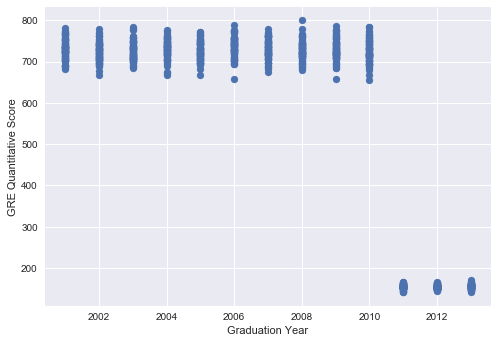

In [288]:
# Scatterplot of GRE quantitative score (y-axis) and graduation year (x-axis)
plt.scatter(x = gradyr, y = greqnt)
plt.xlabel("Graduation Year")
plt.ylabel("GRE Quantitative Score")
plt.show()

In [289]:
'''
   It certainly seems that the GRE scores prior to and in the year 2010
   were using a 200-to-800 scale whereas afterwards, they were using
   130-to-170 scale.
   
   Let us change the scale to the newer version.
'''

# Where does year 2011 begin?
find = 0
for i, yr in enumerate(gradyr):
    if yr == 2011.0:
        find = i
        break

# Min and max of the old score?
print(min(greqnt[0:find]), max(greqnt[0:find]))

# On the conversion table, this maps approximately to
# scores between 151 to 166

greqnt_conversion = greqnt.tolist()[:]

def conversion_gre(old_score):
    
    check1 = old_score >= 200 and old_score <= 800
    check2 = old_score >= 130 and old_score <= 170
    assert check1 or check2, ("The input should either "
                              "be a pre-2011 GRE score "
                              "(200-800), or a post-2011 "
                              "GRE score (130-170).")
    
    new_score = 0
    if old_score >= 200 and old_score <= 800:
        if old_score == 800:
            new_score = 166
        elif old_score < 800 and old_score >= 790:
            new_score = 164
        elif old_score < 790 and old_score >= 780:
            new_score = 163
        elif old_score < 780 and old_score >= 770:
            new_score = 161
        elif old_score < 770 and old_score >= 760:
            new_score = 160
        elif old_score < 760 and old_score >= 750:
            new_score = 159
        elif old_score < 750 and old_score >= 740:
            new_score = 158
        elif old_score < 740 and old_score >= 730:
            new_score = 157
        elif old_score < 730 and old_score >= 720:
            new_score = 156
        elif old_score < 720 and old_score >= 700:
            new_score = 155
        elif old_score < 700 and old_score >= 690:
            new_score = 154
        elif old_score < 690 and old_score >= 680:
            new_score = 153
        elif old_score < 680 and old_score >= 660:
            new_score = 152
        elif old_score < 660 and old_score >= 640:
            new_score = 151
        # the list can go on, but for convenience's sake
        # I will stop here
        return new_score
    else:
        return old_score
    
for i in range(0, len(greqnt_conversion)):
    greqnt_conversion[i] = conversion_gre(greqnt_conversion[i])

iintel["greqnt_conv"] = greqnt_conversion
print(iintel[["greqnt", "greqnt_conv"]].head())

655.7025368703108 799.7155331839259
       greqnt  greqnt_conv
0  739.737072        157.0
1  721.811673        156.0
2  736.277908        157.0
3  770.498485        161.0
4  735.002861        157.0


count    1000.000000
mean      156.195657
std         3.169308
min       141.261398
25%       155.000000
50%       156.000000
75%       158.000000
max       170.000000
Name: greqnt_conv, dtype: float64


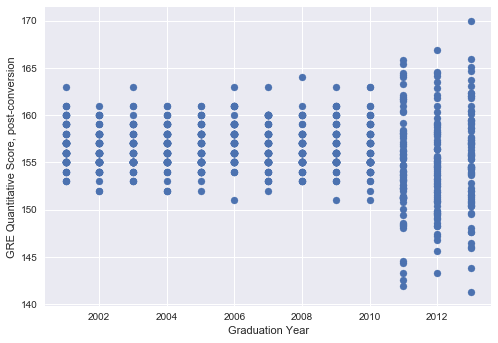

In [290]:
## Checking whether the conversion is more or less valid
## via describe() and scatterplot
print(iintel["greqnt_conv"].describe())
plt.scatter(x = gradyr, y = greqnt_conversion)
plt.xlabel("Graduation Year")
plt.ylabel("GRE Quantitative Score, post-conversion")
plt.show()

#### Problem 2-(c)

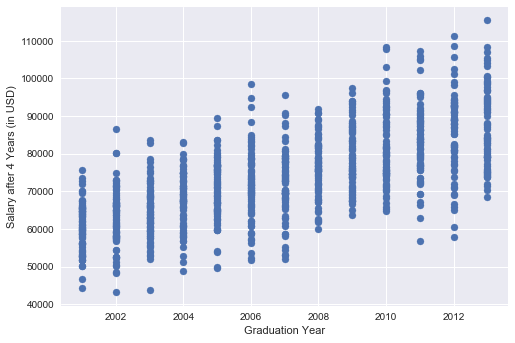

In [291]:
# Scatterplot of GRE quantitative score (y-axis) and graduation year (x-axis)
plt.scatter(x = gradyr, y = salary)
plt.xlabel("Graduation Year")
plt.ylabel("Salary after 4 Years (in USD)")
plt.show()

In [292]:
# Finding the average growth rate of income
avg_sal_yr = iintel.groupby(['gradyr'])['salary'].mean()
avg_sal_yr_list = avg_sal_yr.tolist()

avg_sal_g_rate = []
for i, sal in enumerate(avg_sal_yr_list):
    if i == len(avg_sal_yr_list) - 1:
        break
    else: 
        next_yr = avg_sal_yr_list[i+1]
        g_rate = (next_yr - sal) / sal
        avg_sal_g_rate.append(g_rate)
    
def find_mean_list(some_list):
    adder = 0
    for i in some_list:
        adder = adder + i
    arith_mean = adder / len(some_list)
    
    return arith_mean

# Value of the average growth rate of income
g_overall = find_mean_list(avg_sal_g_rate)
print(g_overall)

0.030835347092883603


In [293]:
# For the de-trending of income
newsal_list = []
salcopy = iintel["salary"].tolist()[:]
for i, sal in enumerate(salcopy):
    newsal = sal
    for t in range(2002, 2014):
        j = t - 2001
        if iintel["gradyr"][i] == t:
            detrend_rate = (1 / (1 + g_overall)) ** j
            newsal = sal * detrend_rate
    newsal_list.append(newsal)

iintel["salary_detrend"] = newsal_list

count     1000.000000
mean     61419.808910
std       7135.610865
min      41164.726530
25%      56616.517414
50%      61467.616002
75%      66218.595876
max      84516.856633
Name: salary_detrend, dtype: float64


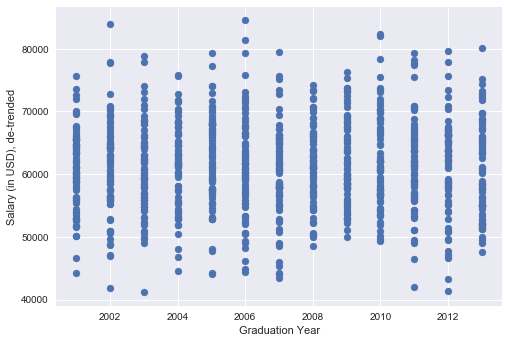

In [294]:
## Checking whether the de-trending is more or less valid
## via scatterplot
print(iintel["salary_detrend"].describe())
plt.scatter(x = gradyr, y = newsal_list)
plt.xlabel("Graduation Year")
plt.ylabel("Salary (in USD), de-trended")
plt.show()

#### Problem 2-(d)

In [295]:
# Setting up the regression variables
dep_var = iintel["salary_detrend"]
exp_vars = iintel["greqnt_conv"]
exp_vars = sm.add_constant(exp_vars, prepend=False)

# Running the regression after making the necessary changes
m_q2_1 = sm.OLS(dep_var, exp_vars)
result_q2_1 = m_q2_1.fit()
print(result_q2_1.summary())

                            OLS Regression Results                            
Dep. Variable:         salary_detrend   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6590
Date:                Wed, 17 Oct 2018   Prob (F-statistic):              0.417
Time:                        01:02:22   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
greqnt_conv   -57.8359     71.246     -0.812      

In [296]:
# Setting up the regression variables for one with time trend
dep_var = iintel["salary"]

years = iintel["gradyr"].tolist()[:]
time = []
for y in years:
    t = y - 2001
    time.append(t)
iintel["time"] = time

exp_vars = iintel[["time", "greqnt_conv"]]
exp_vars = sm.add_constant(exp_vars, prepend=False)

# Running the regression after making the necessary changes
m_q2_2 = sm.OLS(dep_var, exp_vars)
result_q2_2 = m_q2_2.fit()
print(result_q2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     478.8
Date:                Wed, 17 Oct 2018   Prob (F-statistic):          1.78e-146
Time:                        01:02:25   Log-Likelihood:                -10489.
No. Observations:                1000   AIC:                         2.098e+04
Df Residuals:                     997   BIC:                         2.100e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
time         2265.4860     74.503     30.408      

In [297]:
## Splitting the dataset (pre-2011 vs. post-2011)
## and running similar regressions

## Where to split?
for i, yr in enumerate(gradyr):
    if yr == 2011.0:
        split = i
        break

## Pre-2011
dep_var = iintel["salary_detrend"][0:split]
exp_vars = iintel["greqnt_conv"][0:split]
exp_vars = sm.add_constant(exp_vars, prepend=False)

m_q2_sp = sm.OLS(dep_var, exp_vars)
result_q2_sp = m_q2_sp.fit()
print(result_q2_sp.summary())

## In-and-Post-2011
dep_var = iintel["salary_detrend"][split:]
exp_vars = iintel["greqnt_conv"][split:]
exp_vars = sm.add_constant(exp_vars, prepend=False)

m_q2_sp2 = sm.OLS(dep_var, exp_vars)
result_q2_sp2 = m_q2_sp2.fit()
print()
print(result_q2_sp2.summary())

                            OLS Regression Results                            
Dep. Variable:         salary_detrend   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3201
Date:                Wed, 17 Oct 2018   Prob (F-statistic):              0.572
Time:                        01:02:29   Log-Likelihood:                -7916.7
No. Observations:                 770   AIC:                         1.584e+04
Df Residuals:                     768   BIC:                         1.585e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
greqnt_conv   -69.1882    122.297     -0.566      